# Imports


*   *Importing the used libraries in the notebook*
*   *Importing the dataset*



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.linear_model import LogisticRegressionCV

In [ ]:
# A modification is needed here to get it from GOOGLE DRIVE instead of uploading it
df = pd.read_csv('heart.csv')


In [ ]:
# Copying the dataset in a new one that will be cleaned
df_clean = df.copy()

# Dataset Attributes and their descriptions


`age`: Age in years, Numerical 

`sex`:Gender, Categorical

    1: Male
    0: Female

`cp`:Chest pain type, Categorical

    0 : Typical angina
    1 : Atypical angina
    2 : Non-anginal pain
    3 : Asymptomatic

`trestbps`: Resting blood pressure in mmHg, Numerical

`col`:Serum cholesterol in mg/dl, Numerical
 
`fbs`: Fasting blood sugar > 120 mg/dl, Categorical

    1 : True
    0 : False

`restecg`: Resting electrocardiographic results, Categorical

    0 : Normal
    1 :  having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    2 :  showing probable or definite left ventricular hypertrophy by Estes' criteria

`thalach`: Maximum heart rate achieved, Numerical

`exang`: Exercise induced angina, Categorical

    1 : Yes
    0 : No
`oldpeak`: ST depression induced by exercise relative to rest, Numerical

`slope`: Slope of the peak exercise ST segment, Categorical

    0 : Upsloping
    1 : Flat
    2 : Downsloping

`ca`: Number of major vessels colored by fluoroscopy, Numerical

    Range from 0 to 3

`thal`: No description provided, Categorical

    0 : Normal
    1 : Fixed defect
    2 : Reversible defect
    3 : Not specified

`target`: The presence of heart disease, Categorical

    1 : Has heart disease
    0 : Normal


***Reference:***
https://archive.ics.uci.edu/ml/datasets/Heart+Disease  

# Data Preprocessing and Visualization


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


* As noted from the dataset info , there is no null values in the dataset.

In [ ]:
#Investigate the statistical description of the data
df.describe(percentiles=[0.25,0.5,0.75,0.8,0.85,0.9,0.95])

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
80%,62.000000,1.000000,2.000000,144.000000,285.200000,0.000000,1.000000,170.000000,1.000000,1.900000,2.000000,2.000000,3.000000,1.000000
85%,64.000000,1.000000,2.000000,150.000000,298.700000,0.000000,1.000000,173.000000,1.000000,2.200000,2.000000,2.000000,3.000000,1.000000
90%,66.000000,1.000000,2.000000,152.000000,308.800000,1.000000,1.000000,176.600000,1.000000,2.800000,2.000000,2.000000,3.000000,1.000000


* oldpeak & chol are likely to have outliers since the standard deviation is relatively high.

* In the above description for the data, we added more percentiles above 75% to get an intution about the outliers in the data attributes if any, like in `resting electrocardiographic results` attribute for example.

In [ ]:
#Check the number of unique values in each feature
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [ ]:
#Checking the values' counts for each column
v_c = {}
for col in df.columns:
    v_c [col] = [df[col].value_counts()]
v_c

{'age': [58    19
  57    17
  54    16
  59    14
  52    13
  51    12
  62    11
  44    11
  60    11
  56    11
  64    10
  41    10
  63     9
  67     9
  55     8
  45     8
  42     8
  53     8
  61     8
  65     8
  43     8
  66     7
  50     7
  48     7
  46     7
  49     5
  47     5
  39     4
  35     4
  68     4
  70     4
  40     3
  71     3
  69     3
  38     3
  34     2
  37     2
  77     1
  76     1
  74     1
  29     1
  Name: age, dtype: int64], 'ca': [0    175
  1     65
  2     38
  3     20
  4      5
  Name: ca, dtype: int64], 'chol': [234    6
  204    6
  197    6
  269    5
  212    5
        ..
  278    1
  281    1
  284    1
  290    1
  564    1
  Name: chol, Length: 152, dtype: int64], 'cp': [0    143
  2     87
  1     50
  3     23
  Name: cp, dtype: int64], 'exang': [0    204
  1     99
  Name: exang, dtype: int64], 'fbs': [0    258
  1     45
  Name: fbs, dtype: int64], 'oldpeak': [0.0    99
  1.2    17
  0.6    14
  1.0    14
  0.8  

In [ ]:
df["sex"].value_counts()

1    207
0     96
Name: sex, dtype: int64

**Males are more strongly represented in the dataset than females which might lead to bias**


In [ ]:
#Check if there are duplicate examples
df.duplicated().sum()

1

In [ ]:
#Check types and null-values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

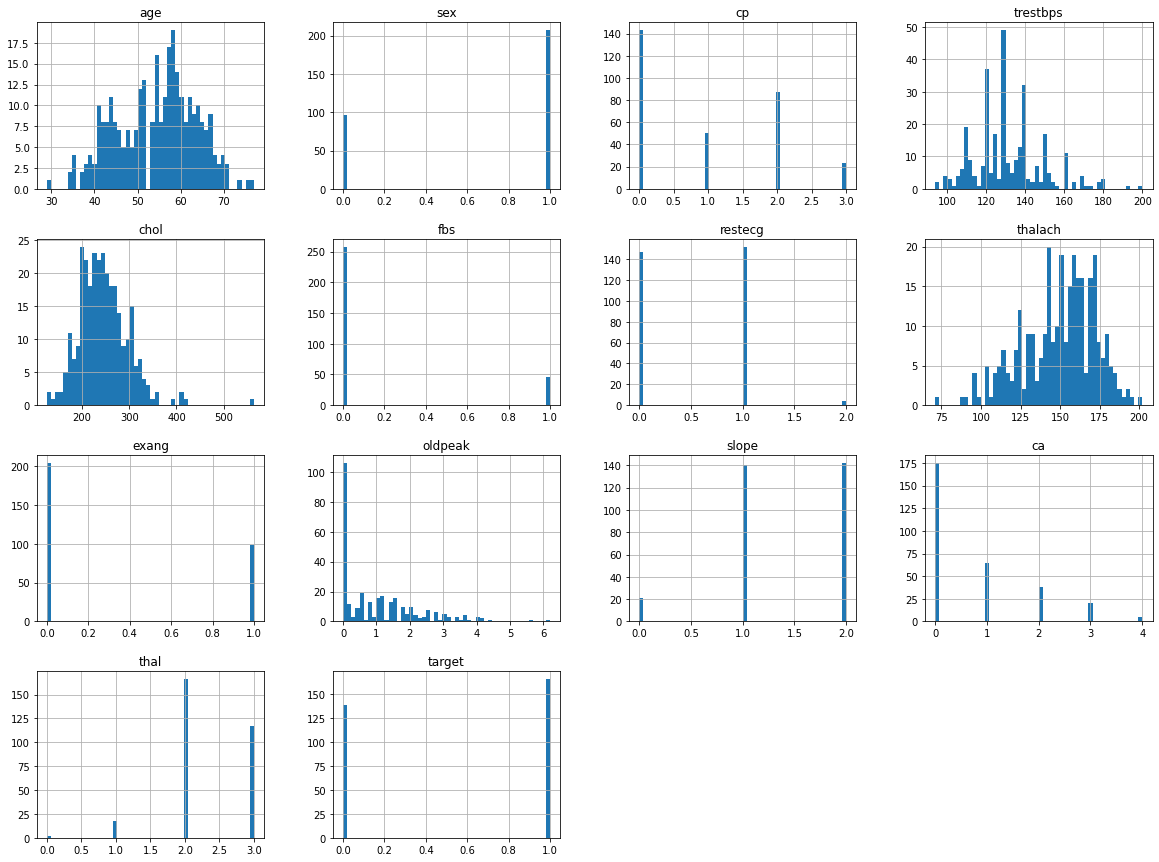

In [ ]:
#Visulaize the attributes
df.hist(bins=50, figsize=(20,15))
plt.show()

* These histograms in addition to the statistics shown about the features suggest performing normalization to the data in order to use it safely in modelling.

## Assessing

1- There appears to be no missing values in dataset.


2- The columns' names are not quite clear.

   
3- There is a 1 duplicated example.

4- trestbps (Resting blood pressure) has one value. However, it should have 2 values (Systolic BP and Diastolic BP)

5- Serum Cholesterol normal levels range up to 200. However, it can "rarely" increase up to 1000 as stated here http://edition.cnn.com/2009/HEALTH/11/24/moh.healthmag.cholesterol.surprises/index.html . In our dataset `chol` ranges from 126 to 564. We cannot consider the high values to be incorrect. They are just outlieres. 

6- `thal` column has three different values in the documentation "0,1,2". However, in the dataset many values appear to have the value "3". We cannot know what this value indicates.

7- According to this reference https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3273956/ there have been several cases of reported "heart rate" above 300. So most of the `thalach` column's values are valid. However, there is a one value = 71 which seems to be incorrect as the column's description is "**maximum** heart rate achieved", but it might be an outlier.

## Cleaning


In [ ]:
#creating a copy of the dataset to clean it
df_clean = df.copy()

#### **For #2 :** Rename the columns to more meaningful names

In [ ]:
#Renaming the columns
df_clean.columns
col = {'cp':'chest_pain_type', 'trestbps':'resting_blood_pressure', 'chol':'serum_cholesterol', 'fbs':'fasting_blood_sugar',
       'restecg':'rest_electrocardiographic_res', 'thalach':'max_heart_rate',
       'exang':'exercise_induced_angina', 'oldpeak':'ST_depression', 'ca':'vessels_count'}
df_clean.rename(columns= col, inplace=True)
df_clean.head()

,age,sex,chest_pain_type,resting_blood_pressure,serum_cholesterol,fasting_blood_sugar,rest_electrocardiographic_res,max_heart_rate,exercise_induced_angina,ST_depression,slope,vessels_count,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#### **For #3 :** Remove the duplicated value

In [ ]:
df_clean.drop_duplicates(inplace=True)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            302 non-null    int64  
 1   sex                            302 non-null    int64  
 2   chest_pain_type                302 non-null    int64  
 3   resting_blood_pressure         302 non-null    int64  
 4   serum_cholesterol              302 non-null    int64  
 5   fasting_blood_sugar            302 non-null    int64  
 6   rest_electrocardiographic_res  302 non-null    int64  
 7   max_heart_rate                 302 non-null    int64  
 8   exercise_induced_angina        302 non-null    int64  
 9   ST_depression                  302 non-null    float64
 10  slope                          302 non-null    int64  
 11  vessels_count                  302 non-null    int64  
 12  thal                           302 non-null    int

#### **For #4 :** We can do nothing about this. We can consider the given value as the "systolic" blood pressure as its mean is = 131 . After all, we will change nothing. We will just deal with it as it is.

#### **For #5 :** We will leave the column as it is.

#### **For #6 :** The value "3" appears in 117 rows, so we cannot drop these columns. We will deal with this value without knowing its indication.


#### **For #7 :** We will leave this example as it is. While training the model, we can examine the effect of removing this example to see whether it will give us better or worse accuracy.

## Questions

#### 1- Is the dataset balanced? 

#### 2- What is the most feature that is correlated to having a heart attack?

#### 3- How many males/females are more prone to having a heart attack?

#### 4- How is the maximum heart rate achieved related to the sex?

## Visualizations

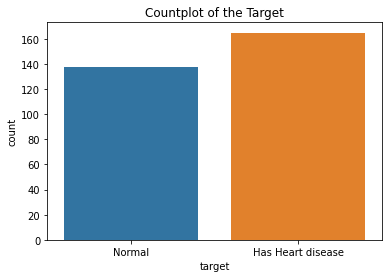

In [ ]:
#1- count plot of the target
ax = sns.countplot(x='target',data=df);
ax.set_xticklabels(['Normal', 'Has Heart disease']);
ax.set_title('Countplot of the Target');

* It is clear that examples for people with higher chance of having a heart attack are slightly more present in the dataset. However, as the difference is not that much big, we can say that the dataset is quite balanced.

In [ ]:
#2-Check the corelated attributes with the 'target' 
corr_matrix = df_clean.corr()['target']
corr_matrix.sort_values(ascending=False)

target                           1.000000
chest_pain_type                  0.432080
max_heart_rate                   0.419955
slope                            0.343940
rest_electrocardiographic_res    0.134874
fasting_blood_sugar             -0.026826
serum_cholesterol               -0.081437
resting_blood_pressure          -0.146269
age                             -0.221476
sex                             -0.283609
thal                            -0.343101
vessels_count                   -0.408992
ST_depression                   -0.429146
exercise_induced_angina         -0.435601
Name: target, dtype: float64

In [ ]:
#Get the highest correlated features
print(corr_matrix[ corr_matrix<-0.3].index);
print(corr_matrix[corr_matrix>0.3].index);

Index(['exercise_induced_angina', 'ST_depression', 'vessels_count', 'thal'], dtype='object')
Index(['chest_pain_type', 'max_heart_rate', 'slope', 'target'], dtype='object')


In [ ]:
high_correlated = df_clean[['exercise_induced_angina','ST_depression','vessels_count','thal','chest_pain_type','max_heart_rate','slope']]
high_correlated.head()

,exercise_induced_angina,ST_depression,vessels_count,thal,chest_pain_type,max_heart_rate,slope
0,0,2.3,0,1,3,150,0
1,0,3.5,0,2,2,187,0
2,0,1.4,0,2,1,172,2
3,0,0.8,0,2,1,178,2
4,1,0.6,0,2,0,163,2


* `chest_pain_type` and `max_heart_rate` have the highest positive correlation to the target, while `exercise_induced_angina`     and `ST_depression` have the highest negative correlation. 

* `fasting_blood_sugar` and `serum_cholesterol` have the lowest correlation. After training the model, we can test the effect of removing these columns. If the accuracy is not greatly affected, we can drop them.

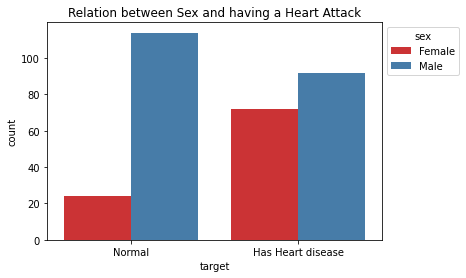

In [ ]:
#3-target=> 0: less chance of heart attack, 1: more chance of heart attack

ax = sns.countplot(x='target', hue='sex', data=df_clean, palette='Set1');
legend_labels, _= ax.get_legend_handles_labels()
ax.legend(legend_labels, ['Female','Male'], 
          bbox_to_anchor=(1,1), 
          title='sex');

ax.set_xticklabels(['Normal', 'Has Heart disease']);
ax.set_title('Relation between Sex and having a Heart Attack');         


*  Males are slightly more likely to have heart attack than females.
*  Males are also more likely to be free of heart attack, but this is due the large number of males compared to females in this dataset.


  (However, this dataset is very small, so it might not be representative of the whole population).

In [ ]:
#To prove the second point
ratio_of_males = sum(df_clean['sex'])/df_clean.shape[0]
ratio_of_males*100

68.21192052980133

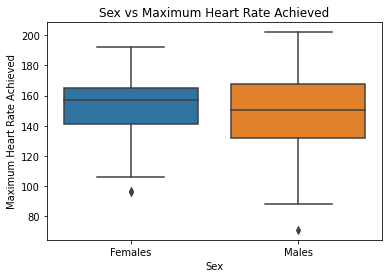

In [ ]:
#4- Plot 'sex' vs 'max_heart_rate' as a box plot
ax = sns.boxplot(x='sex',y='max_heart_rate',data=df_clean);
ax.set_xticklabels(['Females', 'Males']);
ax.set_xlabel('Sex');
ax.set_ylabel('Maximum Heart Rate Achieved');
ax.set_title('Sex vs Maximum Heart Rate Achieved');

* Both genders nearly have the same mean of 'max heart rate' with slightly higher mean for Females.
* The maximum/minimum values for 'max heart rate' is always related to the males.





# Split the dataset into Train and Test

In [ ]:
# spliting the dataset into train and test
X = df_clean.drop('target',axis=1)
y = df_clean['target']
X

,age,sex,chest_pain_type,resting_blood_pressure,serum_cholesterol,fasting_blood_sugar,rest_electrocardiographic_res,max_heart_rate,exercise_induced_angina,ST_depression,slope,vessels_count,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [ ]:
## Normalizing the numerical data
X_numerical = X.drop(['sex','chest_pain_type', 'fasting_blood_sugar', 'rest_electrocardiographic_res','exercise_induced_angina','slope','vessels_count', 'thal'], axis=1)
StandardScaler().fit_transform(X_numerical)#the scaler is fitted to the training set 
X_numerical.describe()

,age,resting_blood_pressure,serum_cholesterol,max_heart_rate,ST_depression
count,302.00000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,131.602649,246.500000,149.569536,1.043046
std,9.04797,17.563394,51.753489,22.903527,1.161452
min,29.00000,94.000000,126.000000,71.000000,0.000000
25%,48.00000,120.000000,211.000000,133.250000,0.000000
50%,55.50000,130.000000,240.500000,152.500000,0.800000
75%,61.00000,140.000000,274.750000,166.000000,1.600000
max,77.00000,200.000000,564.000000,202.000000,6.200000


In [ ]:
for column in X_numerical.columns:
  X[column] = X_numerical[column]

In [ ]:
X

,age,sex,chest_pain_type,resting_blood_pressure,serum_cholesterol,fasting_blood_sugar,rest_electrocardiographic_res,max_heart_rate,exercise_induced_angina,ST_depression,slope,vessels_count,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [ ]:
X_train_original, X_test, y_train_original, y_test = train_test_split(X, y, test_size = 0.1, random_state = 101)


In [ ]:
y_train_original

13     1
228    0
171    0
128    1
119    1
      ..
40     1
75     1
87     1
63     1
11     1
Name: target, Length: 271, dtype: int64

* We will observe whether the accuracy of the models that we will implement will give better results if the dataset is normalized or not.

# **Features Selection**

**Here, we need to use PCA algorithm to select the most significant attributes as independent features.**

In [ ]:
#Fitting the PCA object
pca = PCA();
pca = pca.fit(X_train_original)

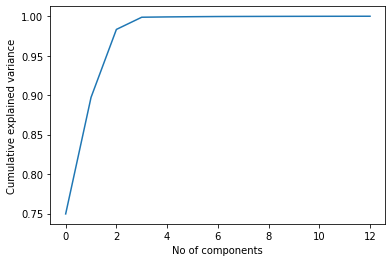

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('No of components')
plt.ylabel('Cumulative explained variance')
plt.show()

**From the previous graph, and because we're testing using feature selection method, we can set our variance representation threshold to be 0.95. Hence we can use 5 PCA components.**

In [ ]:
n_components = 5 #The number of priciple eigen vectors
pca = PCA(n_components=n_components);
pca = pca.fit(X_train_original)

In [ ]:
X_test_pca = pca.transform(X_test)
X_train_pca= pca.transform(X_train_original)

In [ ]:
#Check the shapes again!!
print(X_train_pca.shape,X_test_pca.shape)

(271, 5) (31, 5)


***By now, we are ready to train and test our models using 5 parallel datasets; the one with the normal features and the one with the 9 PCA components.***

# **Models**

## ***1 - Logistic Regression***

In [ ]:
#Fit a logistic regression model with cross validation
k_folds = 5;
lg_cls = LogisticRegressionCV(max_iter = 1000, cv=k_folds, random_state=1)
lg_cls.fit(X_train_original, y_train_original)

LogisticRegressionCV(Cs=10, class_weight=None, cv=5, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=1000, multi_class='auto', n_jobs=None,
                     penalty='l2', random_state=1, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

In [ ]:
# Model Evaluation
lg_outcome = lg_cls.predict(X_train_original)
p_score = precision_score(y_train_original,lg_outcome)
r_score = recall_score(y_train_original,lg_outcome)
f1_sc = f1_score(y_train_original,lg_outcome)
print('For the training data: ')
print(p_score, r_score, f1_sc)

For the training data: 
0.8106508875739645 0.9319727891156463 0.8670886075949368


*Show the confusion matrix for the training set*

In [ ]:
confusion_matrix(y_train_original,lg_outcome)

array([[ 92,  32],
       [ 10, 137]])

In [ ]:
# A Function to plot the ROC curve
def plot_roc_curve(false_positive_rate, true_positive_rate):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=6)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)

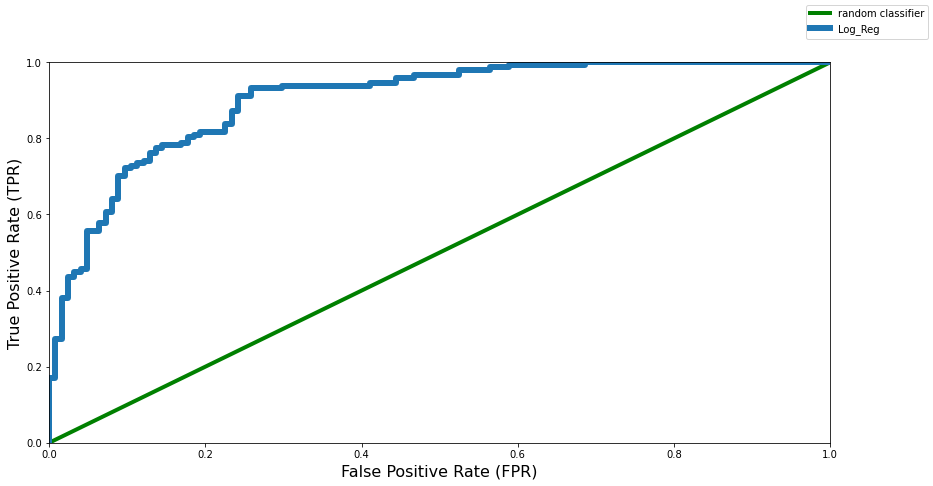

In [ ]:
ax = plt.figure(figsize=(14, 7))
plt.plot([0, 1], [0, 1], 'g', linewidth=4) #the random classifier

# Get the predicted probabilities 
lg_cls_probs = lg_cls.predict_proba(X_train_original)[:,1]
# Compute true positive rate and false positive rate
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train_original, lg_cls_probs)
plot_roc_curve(false_positive_rate, true_positive_rate)
## Adding legend
ax.legend(['random classifier','Log_Reg']);

In [ ]:
print("Thresholds: ", thresholds)
print("True positive rate: ", true_positive_rate)
print("False positive rate: ", false_positive_rate)

Thresholds:  [1.97233075 0.97233075 0.88599662 0.88410969 0.8440359  0.84265227
 0.81074186 0.80878709 0.79711683 0.79591118 0.79088128 0.78996425
 0.78959586 0.78728452 0.74435207 0.74021014 0.73393458 0.73094571
 0.72476012 0.72299809 0.70859451 0.7064863  0.67862241 0.67789597
 0.66618794 0.66565657 0.6630733  0.65773915 0.65731945 0.65571833
 0.65500662 0.65194973 0.64837043 0.64776331 0.64014413 0.63880326
 0.63716636 0.61717927 0.61694971 0.61322507 0.60236423 0.60169296
 0.60086362 0.59949227 0.59878631 0.58427081 0.57925896 0.57909862
 0.57012413 0.56209284 0.53151864 0.52850831 0.52072221 0.46999503
 0.46228386 0.35938652 0.35810958 0.32766793 0.29333964 0.26639693
 0.26524227 0.22726822 0.22255811 0.20539519 0.20182767 0.1915755
 0.18064459 0.14783838 0.14617193 0.01547904]
True positive rate:  [0.         0.00680272 0.17006803 0.17006803 0.27210884 0.27210884
 0.38095238 0.38095238 0.43537415 0.43537415 0.44897959 0.44897959
 0.45578231 0.45578231 0.55782313 0.55782313 0.578

**As we need the true positive rate to be as high as possible, we can set the threshold to be 0.531, hence we get TPR of 0.911 and FPR of 0.24 and this would be our tolerance which we can test on the test set.**

*We would now create a new function to get the output according to our threshold.*

In [ ]:
def predict_with_threshold(threshold,x_input,classifier):
  cls_probs = classifier.predict_proba(x_input)[:,1]
  predictions = []
  for i in range(len(cls_probs)):
    if cls_probs[i]>threshold:
      predictions.append(1)
    else:
      predictions.append(0)
  return predictions

**Hence, the new customized predictions are:**

In [ ]:
threshold = 0.531
outcome_test = predict_with_threshold(threshold,X_test,lg_cls)

*Show the confusion matrix for the test*

In [ ]:
confusion_matrix(y_test,outcome_test)

array([[13,  1],
       [ 1, 16]])

*Calculate the recall and precision score*

In [ ]:
p_score = precision_score(y_test,outcome_test)
r_score = recall_score(y_test,outcome_test)
f1_sc =  f1_score(y_test,outcome_test)
print(p_score, r_score, f1_sc)

0.9411764705882353 0.9411764705882353 0.9411764705882353


We got the recall score = 0.941; however, the percision score is also 0.94. The perfect recall metric can be obtained due to the few number of samples

***Next, we try the same procedure for the PCA output..***

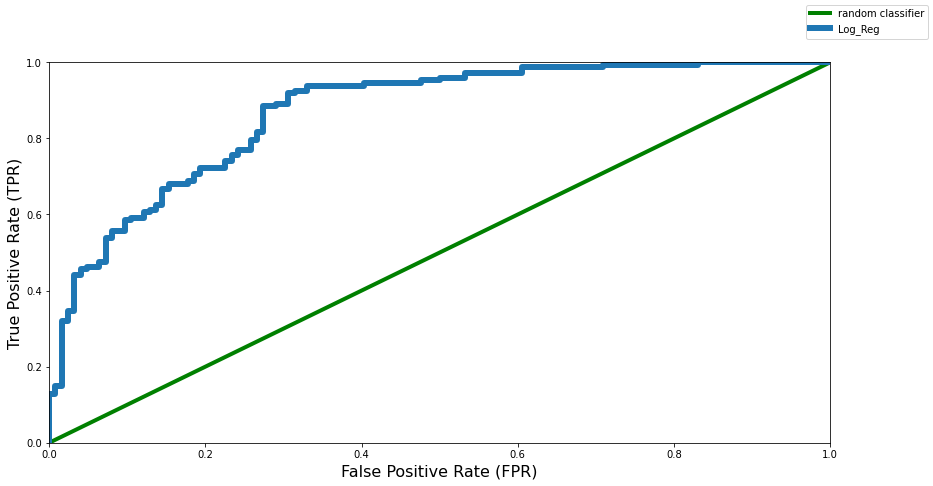

In [ ]:
#Fit a logistic regression model
lg_cls_pca = LogisticRegressionCV(max_iter = 1000, cv=k_folds, random_state=1)
lg_cls_pca.fit(X_train_pca,y_train_original)

# Plot the ROC curve
ax = plt.figure(figsize=(14, 7))
plt.plot([0, 1], [0, 1], 'g', linewidth=4) #the random classifier

# Get the predicted probabilities 
lg_cls_probs = lg_cls_pca.predict_proba(X_train_pca)[:,1] #to get the probabilities of 1 (Positive)
# Compute true positive rate and false positive rate
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train_original, lg_cls_probs)
plot_roc_curve(false_positive_rate, true_positive_rate)
## Adding legend
ax.legend(['random classifier','Log_Reg']);

In [ ]:
print("Thresholds: ", thresholds)
print("True positive rate: ", true_positive_rate)
print("False positive rate: ", false_positive_rate)

Thresholds:  [1.97505004e+00 9.75050037e-01 9.28640635e-01 9.27985509e-01
 9.12505178e-01 9.10354797e-01 8.70866670e-01 8.69886975e-01
 8.65312842e-01 8.63238277e-01 8.39771158e-01 8.39563818e-01
 8.34252900e-01 8.32173982e-01 8.31133831e-01 8.27444022e-01
 8.17298872e-01 8.12775148e-01 7.90162775e-01 7.90048438e-01
 7.82129361e-01 7.77488763e-01 7.58099544e-01 7.55715444e-01
 7.50745159e-01 7.44272765e-01 7.42760909e-01 7.38160678e-01
 7.28986677e-01 7.21489549e-01 7.15802647e-01 7.13798625e-01
 7.02817318e-01 7.02410543e-01 6.93380308e-01 6.88239146e-01
 6.85773120e-01 6.82106228e-01 6.69992511e-01 6.63795143e-01
 6.58606462e-01 6.50623519e-01 6.46390963e-01 6.40454081e-01
 6.24009278e-01 6.23450543e-01 6.18005260e-01 6.04977287e-01
 5.87727079e-01 5.86103481e-01 5.71477988e-01 5.67970647e-01
 5.22878607e-01 4.84309903e-01 4.82052338e-01 4.60700819e-01
 4.44612843e-01 4.42100653e-01 4.10146163e-01 3.88081698e-01
 3.79923671e-01 3.07325237e-01 3.00880313e-01 2.36814410e-01
 2.35345986

**Here, a threshold of 0.37 can be chosen from the previous results**

In [ ]:
# For the training set
threshold = 0.37
outcome_train = predict_with_threshold(threshold,X_train_pca,lg_cls_pca)
p_score = precision_score(y_train_original,outcome_train)
r_score = recall_score(y_train_original,outcome_train)
f1_sc =  f1_score(y_train_original,outcome_train)
print(p_score, r_score, f1_sc)

0.7666666666666667 0.9387755102040817 0.8440366972477065


In [ ]:
#For the test set
threshold = 0.37
outcome_test = predict_with_threshold(threshold,X_test_pca,lg_cls_pca)
p_score = precision_score(y_test,outcome_test)
r_score = recall_score(y_test,outcome_test)
f1_sc =  f1_score(y_test,outcome_test)
print(p_score, r_score, f1_sc)

0.85 1.0 0.9189189189189189


***The situation here is suspicious of possible overfitting due to the few data samples. However, the results show no very superior behaviour for PCA over the oringial features as expected. It's believed that happened due to the few number of samples.***

Finding if the results are biased in terms of the female/male distribution

In [ ]:
X_train_sex= pd.DataFrame(X_train_original['sex'])
X_train_sex['target']=y_train_original
X_train_sex["error"] = y_train_original - outcome_train
errors_False_negative = X_train_sex.loc[X_train_sex['error']==1 ]
errors_False_positive= X_train_sex.loc[X_train_sex['error']==-1 ]
positives = X_train_sex.loc[X_train_sex['target']==1 ]
negatives = X_train_sex.loc[X_train_sex['target']==0 ]
print("No. of females is {}".format(X_train_sex.loc[X_train_sex['sex']==0 ].count() ))
print("No. of males is {}".format(X_train_sex.loc[X_train_sex['sex']==1 ].count() ))
print('female_male distribution of positives')
print(positives['sex'].value_counts())
print('female_male distribution of negatives')
print(negatives['sex'].value_counts())
print('female_male distribution of false negatives')
print(errors_False_negative['sex'].value_counts())
print('female_male distribution of false positives')
print(errors_False_positive['sex'].value_counts())

No. of females is sex       88
target    88
error     88
dtype: int64
No. of males is sex       183
target    183
error     183
dtype: int64
female_male distribution of positives
1    82
0    65
Name: sex, dtype: int64
female_male distribution of negatives
1    101
0     23
Name: sex, dtype: int64
female_male distribution of false negatives
1    7
0    2
Name: sex, dtype: int64
female_male distribution of false positives
1    34
0     8
Name: sex, dtype: int64


In [ ]:
X_test_sex= pd.DataFrame(X_test['sex'])
X_test_sex["error"] = abs(y_test - outcome_test)
errors = X_test_sex.loc[X_test_sex['error']==1 ]
errors


,sex,error
170,1,1
205,1,1
238,1,1


## ***2-KNN***

### KNN Using the results obtained from the PCA

In [ ]:
K = 3

knn= KNeighborsClassifier(K)
knn.fit(X_train_pca, y_train_original)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [ ]:
y_pred = knn.predict(X_train_pca)
print('The scores of KNN with K = {} on train data using PCA is\n'.format(K))

print(f'f1 score = {f1_score(y_train_original, y_pred)}')
print(f'precision = {precision_score(y_train_original, y_pred)}')
print(f'recall = {recall_score(y_train_original, y_pred)}')


The scores of KNN with K = 3 on train data using PCA is

f1 score = 0.7551020408163265
precision = 0.7551020408163265
recall = 0.7551020408163265


In [ ]:
y_pred = knn.predict(X_test_pca)
print('The scores of KNN with K = {} on test data using PCA is\n'.format(K))

print(f'f1 score = {f1_score(y_test, y_pred)}')
print(f'precision = {precision_score(y_test, y_pred)}')
print(f'recall = {recall_score(y_test, y_pred)}')


The scores of KNN with K = 3 on test data using PCA is

f1 score = 0.787878787878788
precision = 0.8125
recall = 0.7647058823529411


In [ ]:
confusion_matrix(y_test, y_pred)

array([[11,  3],
       [ 4, 13]])

### Hyper parameter tuning using grid search with cross validation

In [ ]:
# Grid Search

# Set the parameters by cross-validation
tuned_parameters = [{'n_neighbors':list(range(3,30,2)),
                     'weights':['distance','uniform'],
                     'algorithm':['auto','kd_tree','ball_tree'],
                     'p':[1,2]}]

scores = 'f1'
knn = KNeighborsClassifier()


print("# Tuning hyper-parameters for %s" % score)
print()

clf = GridSearchCV(knn, tuned_parameters, scoring=score, cv=5)

clf.fit(X_train_pca, y_train_original)

print("The best hyper-parameters found using Grid Search:")
print()
print(clf.best_params_)
print()

print("Detailed classification report:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
y_true, y_pred = y_test, clf.predict(X_test_pca)
print(classification_report(y_true, y_pred))
print('-----------------------------------------------------')

# Tuning hyper-parameters for recall

The best hyper-parameters found using Grid Search:

{'algorithm': 'auto', 'n_neighbors': 25, 'p': 1, 'weights': 'uniform'}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

              precision    recall  f1-score   support

           0       0.92      0.86      0.89        14
           1       0.89      0.94      0.91        17

    accuracy                           0.90        31
   macro avg       0.91      0.90      0.90        31
weighted avg       0.90      0.90      0.90        31

-----------------------------------------------------


In [ ]:
print(clf.best_estimator_)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=25, p=1,
                     weights='uniform')


In [ ]:
knn= clf.best_estimator_
knn.fit(X_train_pca, y_train_original)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=25, p=1,
                     weights='uniform')

In [ ]:
y_pred = knn.predict(X_train_pca)
print('The scores of KNN using best parameters obtained by grid search on train data is\n')

print(f'f1 score = {f1_score(y_train_original, y_pred)}')
print(f'precision = {precision_score(y_train_original, y_pred)}')
print(f'recall = {recall_score(y_train_original, y_pred)}')


The scores of KNN using best parameters obtained by grid search on train data is

f1 score = 0.7215189873417722
precision = 0.6745562130177515
recall = 0.7755102040816326


In [ ]:
y_pred = knn.predict(X_test_pca)
print('The scores of KNN using best parameters obtained by grid search on test data is\n')

print(f'f1 score = {f1_score(y_test, y_pred)}')
print(f'precision = {precision_score(y_test, y_pred)}')
print(f'recall = {recall_score(y_test, y_pred)}')


The scores of KNN using best parameters obtained by grid search on test data is

f1 score = 0.9142857142857143
precision = 0.8888888888888888
recall = 0.9411764705882353


## **3- Random Forest**

In [ ]:
#Setting the parameters
max_features = X_train_pca.shape[1]
max_depth = range(5,max_features+1)
n_estimators = range(10,201,10)
k_fold = [(slice(None), slice(None))] #to stop using cross validation

In [ ]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'random_state': [1],
    'bootstrap': [True],
    'max_depth': max_depth,
    'max_features': [max_features], #Hence using all the features
    'n_estimators': n_estimators
}
# Define the base model
rf_clf = RandomForestClassifier()
# Create the GridSearch with cross validation 
rf_grid_search = GridSearchCV(estimator = rf_clf, param_grid = param_grid, cv = k_fold, n_jobs = -1, verbose = 2)
#Fit on the PCA data
rf_grid_search.fit(X_train_pca,y_train_original)

Fitting 1 folds for each of 20 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    4.4s finished


GridSearchCV(cv=[(slice(None, None, None), slice(None, None, None))],
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_

In [ ]:
#Discovering the best parameters for random forest classifier
rf_grid_search.best_params_

{'bootstrap': True,
 'max_depth': 5,
 'max_features': 5,
 'n_estimators': 60,
 'random_state': 1}

In [ ]:
rf_grid_search.best_score_

0.9188191881918819

*Evaluate on the training set*

In [ ]:
rf_cls = rf_grid_search.best_estimator_
y_predicted = rf_cls.predict(X_train_pca)

*Show the confusion matrix for the training set*

In [ ]:
confusion_matrix(y_train_original,y_predicted)

array([[106,  18],
       [  4, 143]])

In [ ]:
#Evaluate on the training set
p_score = precision_score(y_train_original,y_predicted)
r_score = recall_score(y_train_original,y_predicted)
f1_sc = f1_score(y_train_original,y_predicted)
print(p_score, r_score, f1_sc) 

0.8881987577639752 0.9727891156462585 0.9285714285714285


*Evaluate on the test set*

In [ ]:
#Get the test set predicitons
y_predicted = rf_cls.predict(X_test_pca)

*Show the confusion matrix for the test set*

In [ ]:
confusion_matrix(y_test,y_predicted)

array([[11,  3],
       [ 2, 15]])

In [ ]:
#Evaluate on the test set
p_score = precision_score(y_test,y_predicted)
r_score = recall_score(y_test,y_predicted)
f1_sc =  f1_score(y_test,y_predicted)

print(p_score, r_score,f1_sc) 

0.8333333333333334 0.8823529411764706 0.8571428571428571


**Nice!! The recall value on the test set is 0.882 which is good , the precision value is also 0.83 which is accpeted. However, the logisitic regression model seems to be better than the random forest**

## SVM 

Due to the relative small size of the dataset, cross validation grid search is used to assess different SVM models. CV is solely used at first to identify the range for each parameter

##### 1- Linear Kernel

1
2
3
4
5
6
7
8
9
[0.8838095238095237, 0.8838095238095237, 0.8838095238095237, 0.8838095238095237, 0.8838095238095237, 0.8838095238095237, 0.8838095238095237, 0.8838095238095237, 0.8838095238095237]
[0.7798752395695119, 0.7798752395695119, 0.7798752395695119, 0.7798752395695119, 0.7754892746572313, 0.7754892746572313, 0.7754892746572313, 0.7754892746572313, 0.7754892746572313]


Text(0, 0.5, 'Cross-Validated Accuracy')

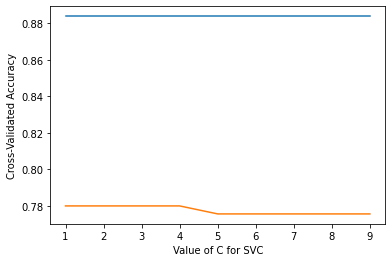

In [ ]:
# varying C for linear Kernel
C_range=np.arange(1,10,1)
acc_score_recall=[]
acc_score_precision=[]
for c in C_range:
    svc = SVC(kernel='linear', C=c)
    print(c)
    recall_scores = cross_val_score(svc, X_train_pca, y_train_original, cv=10, scoring='recall')
    precision_scores = cross_val_score(svc, X_train_pca, y_train_original, cv=10, scoring='precision')
    acc_score_recall.append(recall_scores.mean())
    acc_score_precision.append(precision_scores.mean())
print(acc_score_recall)
print(acc_score_precision)

# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(C_range,acc_score_recall)
plt.plot(C_range,acc_score_precision)
plt.xlabel('Value of C for SVC')
plt.ylabel('Cross-Validated Accuracy')

0.1
0.2
0.30000000000000004
0.4
0.5
0.6
0.7000000000000001
0.8
0.9
[0.8838095238095237, 0.877142857142857, 0.877142857142857, 0.877142857142857, 0.877142857142857, 0.877142857142857, 0.8838095238095237, 0.8838095238095237, 0.8838095238095237]
[0.7754892746572313, 0.7788948474126491, 0.7788948474126491, 0.7788948474126491, 0.7788948474126491, 0.7788948474126491, 0.7798752395695119, 0.7798752395695119, 0.7798752395695119]


Text(0, 0.5, 'Cross-Validated Accuracy')

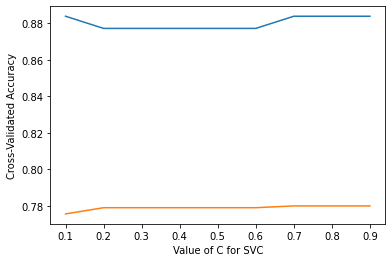

In [ ]:
# varying C for linear Kernel
C_range=np.arange(0.1,1,0.1)
acc_score_recall=[]
acc_score_precision=[]
for c in C_range:
    print(c)
    svc = SVC(kernel='linear', C=c)
    recall_scores = cross_val_score(svc, X_train_pca, y_train_original, cv=10, scoring='recall')
    precision_scores = cross_val_score(svc, X_train_pca, y_train_original, cv=10, scoring='precision')
    acc_score_recall.append(recall_scores.mean())
    acc_score_precision.append(precision_scores.mean())
print(acc_score_recall)
print(acc_score_precision)

# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(C_range,acc_score_recall)
plt.plot(C_range,acc_score_precision)
plt.xlabel('Value of C for SVC')
plt.ylabel('Cross-Validated Accuracy')

[0.8914285714285715, 0.9047619047619049, 0.8980952380952381, 0.8980952380952381, 0.8909523809523809, 0.8838095238095237, 0.8838095238095237, 0.8838095238095237, 0.8838095238095237]
[0.7363454592363261, 0.7667982456140351, 0.7651642586859305, 0.7636949604403165, 0.7671099931200551, 0.7661576121676741, 0.770251179419136, 0.770251179419136, 0.770251179419136]


Text(0, 0.5, 'Cross-Validated Accuracy')

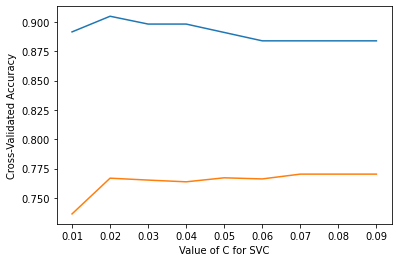

In [ ]:
# varying C for linear Kernel
C_range=np.arange(0.01,0.1,0.01)
acc_score_recall=[]
acc_score_precision=[]
for c in C_range:

    svc = SVC(kernel='linear', C=c)
    recall_scores = cross_val_score(svc, X_train_pca, y_train_original, cv=10, scoring='recall')
    precision_scores = cross_val_score(svc, X_train_pca, y_train_original, cv=10, scoring='precision')
    acc_score_recall.append(recall_scores.mean())
    acc_score_precision.append(precision_scores.mean())
print(acc_score_recall)
print(acc_score_precision)

# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(C_range,acc_score_recall)
plt.plot(C_range,acc_score_precision)
plt.xlabel('Value of C for SVC')
plt.ylabel('Cross-Validated Accuracy')

##### 2- rbf Kernel

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[0.5424603174603174, 0.5424603174603174, 0.5424603174603174, 0.5424603174603174, 0.5424603174603174, 0.5424603174603174, 0.5424603174603174, 0.5424603174603174, 0.5424603174603174, 0.5424603174603174]


Text(0, 0.5, 'Cross-Validated Accuracy')

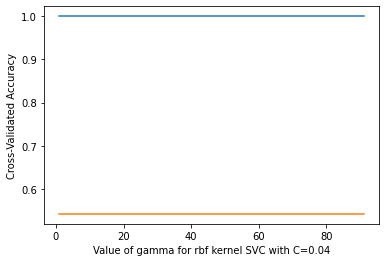

In [ ]:
# varying gamma for rbf kernel
gamma_range = list(np.arange(1,100,10))
acc_score_recall_rbf=[]
acc_score_precision_rbf=[]
for g in gamma_range:
    svc = SVC(kernel='rbf', gamma=g)
    recall_scores = cross_val_score(svc, X_train_pca, y_train_original, cv=10, scoring='recall')
    precision_scores = cross_val_score(svc, X_train_pca, y_train_original, cv=10, scoring='precision')
    acc_score_recall_rbf.append(recall_scores.mean())
    acc_score_precision_rbf.append(precision_scores.mean())
print(acc_score_recall_rbf)
print(acc_score_precision_rbf)

# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(gamma_range,acc_score_recall_rbf)
plt.plot(gamma_range,acc_score_precision_rbf)
plt.xlabel('Value of gamma for rbf kernel SVC with C=0.04')
plt.ylabel('Cross-Validated Accuracy')

[0.780952380952381, 0.9047619047619048, 0.9595238095238094, 0.9800000000000001, 0.9800000000000001, 0.9800000000000001, 0.9800000000000001, 0.9866666666666667, 0.9866666666666667, 0.9866666666666667]
[0.5683803605347555, 0.5556422200987419, 0.5580811965811966, 0.5563304843304844, 0.5498746438746438, 0.5455840455840455, 0.5455840455840455, 0.5472934472934472, 0.5430199430199429, 0.539041514041514]


Text(0, 0.5, 'Cross-Validated Accuracy')

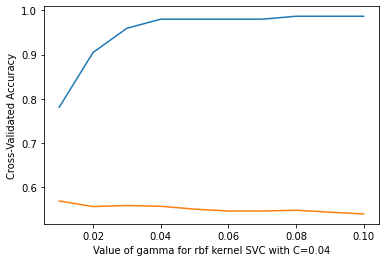

In [ ]:
# varying gamma for rbf kernel
gamma_range = list(np.arange(0.01,0.11,0.01))
acc_score_recall_rbf=[]
acc_score_precision_rbf=[]
for g in gamma_range:
    svc = SVC(kernel='rbf', gamma=g)
    recall_scores = cross_val_score(svc, X_train_pca, y_train_original, cv=10, scoring='recall')
    precision_scores = cross_val_score(svc, X_train_pca, y_train_original, cv=10, scoring='precision')
    acc_score_recall_rbf.append(recall_scores.mean())
    acc_score_precision_rbf.append(precision_scores.mean())
print(acc_score_recall_rbf)
print(acc_score_precision_rbf)

# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(gamma_range,acc_score_recall_rbf)
plt.plot(gamma_range,acc_score_precision_rbf)
plt.xlabel('Value of gamma for rbf kernel SVC with C=0.04')
plt.ylabel('Cross-Validated Accuracy')

[0.7609523809523809, 0.7747619047619048, 0.7404761904761904, 0.72, 0.7, 0.6866666666666666, 0.7, 0.7, 0.7, 0.7066666666666667]
[0.6511241673702974, 0.6468596900175847, 0.6352065826330532, 0.6368323996265174, 0.6215244559362206, 0.6179950441715147, 0.6252744559362207, 0.6216796846943906, 0.6174313186813187, 0.6274313186813186]


Text(0, 0.5, 'Cross-Validated Accuracy')

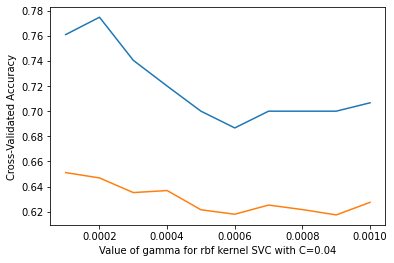

In [ ]:
# varying gamma for rbf kernel
gamma_range = list(np.arange(0.0001,0.0011,0.0001))
acc_score_recall_rbf=[]
acc_score_precision_rbf=[]
for g in gamma_range:
    svc = SVC(kernel='rbf', gamma=g)
    recall_scores = cross_val_score(svc, X_train_pca, y_train_original, cv=10, scoring='recall')
    precision_scores = cross_val_score(svc, X_train_pca, y_train_original, cv=10, scoring='precision')
    acc_score_recall_rbf.append(recall_scores.mean())
    acc_score_precision_rbf.append(precision_scores.mean())
print(acc_score_recall_rbf)
print(acc_score_precision_rbf)

# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(gamma_range,acc_score_recall_rbf)
plt.plot(gamma_range,acc_score_precision_rbf)
plt.xlabel('Value of gamma for rbf kernel SVC with C=0.04')
plt.ylabel('Cross-Validated Accuracy')

##### 3- Poly Kernel

1
2
3
4
[(1, 0.7235563390402101), (2, 0.7080118803931384), (3, 0.747668478194794), (4, 0.7046298438403703)]
[(1, 0.7952380952380953), (2, 0.9657142857142859), (3, 0.9452380952380952), (4, 0.9447619047619048)]
[(1, 0.6702020202020202), (2, 0.5597533022533023), (3, 0.6195026350461134), (4, 0.5627921354008311)]


Text(0, 0.5, 'Cross-Validated Accuracy')

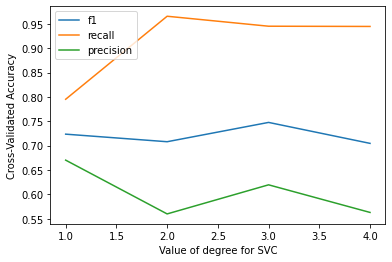

In [ ]:
degree_range=list(range(1,5,1))
acc_score_poly=[]
acc_score_recall=[]
acc_score_precision=[]
for deg in degree_range:
    print(deg)
    svc = SVC(kernel='poly', degree=deg)
    scores = cross_val_score(svc, X_train_pca, y_train_original, cv=10, scoring='f1')
    scores_precision = cross_val_score(svc, X_train_pca, y_train_original, cv=10, scoring='precision')
    scores_recall = cross_val_score(svc, X_train_pca, y_train_original, cv=10, scoring='recall')
    acc_score_poly.append(scores.mean())
    acc_score_precision.append(scores_precision.mean())
    acc_score_recall.append(scores_recall.mean())
print(list(zip(degree_range,acc_score_poly)))
print(list(zip(degree_range,acc_score_recall)))
print(list(zip(degree_range,acc_score_precision)))
# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(degree_range,acc_score_poly)
plt.plot(degree_range,acc_score_recall)
plt.plot(degree_range,acc_score_precision)
plt.legend(labels= ["f1","recall","precision"])
plt.xlabel('Value of degree for SVC')
plt.ylabel('Cross-Validated Accuracy')

#### Grid Search

In [ ]:
tuned_parameters = {
    'C':  [0.003,0.005,1],
    'gamma':[0.0001,'scale'],
    "degree": [3],
    "kernel":[ 'rbf', 'linear', 'poly']

}
svm= SVC()

svm = GridSearchCV(svm, tuned_parameters,cv=10,scoring="recall")
svm.fit(X_train_pca, y_train_original)
print(svm.best_score_)
print(svm.best_params_)

y_train_predict = svm.predict(X_train_pca)
recall_Score = recall_score(y_train_original,y_train_predict)
precision_Score = precision_score(y_train_original,y_train_predict)
accuracy_Score = accuracy_score(y_train_original,y_train_predict)
print("Recall score = {}\nPrecision score = {}\nAccuracy score = {}".format(recall_Score, precision_Score, accuracy_Score))
confusion_matrix(y_train_original,y_train_predict)

1.0
{'C': 0.003, 'degree': 3, 'gamma': 0.0001, 'kernel': 'rbf'}
Recall score = 1.0
Precision score = 0.5424354243542435
Accuracy score = 0.5424354243542435


array([[  0, 124],
       [  0, 147]])

In [ ]:
tuned_parameters = {
    'C':  [0.003,0.005,1],
    'gamma':[0.0001,'scale'],
    "degree": [3],
    "kernel":[ 'rbf', 'linear', 'poly']

}
svm= SVC()

svm = GridSearchCV(svm, tuned_parameters,cv=10,scoring="accuracy")
svm.fit(X_train_pca, y_train_original)
print(svm.best_score_)
print(svm.best_params_)
y_train_predict = svm.predict(X_train_pca)
recall_Score = recall_score(y_train_original,y_train_predict)
precision_Score = precision_score(y_train_original,y_train_predict)
accuracy_Score = accuracy_score(y_train_original,y_train_predict)
print("Recall score = {}\nPrecision score = {}\nAccuracy score = {}".format(recall_Score, precision_Score, accuracy_Score))
confusion_matrix(y_train_original,y_train_predict)

0.8005291005291004
{'C': 1, 'degree': 3, 'gamma': 0.0001, 'kernel': 'linear'}
Recall score = 0.891156462585034
Precision score = 0.7891566265060241
Accuracy score = 0.8118081180811808


array([[ 89,  35],
       [ 16, 131]])

In [ ]:
tuned_parameters = {
    'C':  [0.003,1,1.5],
    'gamma':[0.0001,'scale'],
    "degree": [3],
    "kernel":[ 'rbf', 'linear', 'poly']

}
svm= SVC()

svm = GridSearchCV(svm, tuned_parameters,cv=10,scoring='precision')
svm.fit(X_train_pca, y_train_original)
print(svm.best_score_)
print(svm.best_score_)
print(svm.best_params_)
y_train_predict = svm.predict(X_train_pca)
recall_Score = recall_score(y_train_original,y_train_predict)
precision_Score = precision_score(y_train_original,y_train_predict)
accuracy_Score = accuracy_score(y_train_original,y_train_predict)
print("Recall score = {}\nPrecision score = {}\nAccuracy score = {}".format(recall_Score, precision_Score, accuracy_Score))
confusion_matrix(y_train_original,y_train_predict)

0.7798752395695119
0.7798752395695119
{'C': 1, 'degree': 3, 'gamma': 0.0001, 'kernel': 'linear'}
Recall score = 0.891156462585034
Precision score = 0.7891566265060241
Accuracy score = 0.8118081180811808


array([[ 89,  35],
       [ 16, 131]])

#### **Final SVM model**

In [ ]:
svm_final = SVC(kernel='linear', C=1)
svm_final.fit(X_train_pca,y_train_original)
y_pred = svm_final.predict(X_test_pca)
recall_Score = recall_score(y_test,y_pred)
precision_Score = precision_score(y_test,y_pred)
accuracy_Score = accuracy_score(y_test,y_pred)
print("Recall score = {}\nPrecision score = {}\nAccuracy score = {}".format(recall_Score, precision_Score, accuracy_Score))
confusion_matrix(y_test,y_pred)

Recall score = 0.8235294117647058
Precision score = 0.8235294117647058
Accuracy score = 0.8064516129032258


array([[11,  3],
       [ 3, 14]])